#Feed Forward Neural Network (ANN)

I tried many architectures for this and with the architecture below and with standardized imagedataset I was able to reach an accuracy slightly above **55%**. <br>

I will like ko share some of the architectures I tried.
The first architecture I tried on it had 4 hidden layers of 1500,768,384,192 neurons respectively and each layer had a l2 regularization with lmbda = 0.01 however this gave me a 10% accuracy only without the dataset being normalized doing  and it gave a 48% accuracy with normalization where it was normalized doing (dataset - 255)/255. <br>

When I tried it with normalied input and three hidden layers each with 600,400 and 100 neurons respectively and the first two having a droput of 0.2 after the first two layers and ran it for 80 epoch I reached an accuracy of 49%.

However, the architecture from which I was able to get max accuracy that is the input is standardized and there are 3 hidden layers of 1024,256 and 100 neurons repsectively with the first two hidden layers having a dropout of 0.17 and this being run with 50 epochs.


In [2]:
%tensorflow_version 1.x
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2

TensorFlow is already loaded. Please restart the runtime to change versions.


Loading Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   #loading the data
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)  #shapes of test and train

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
categorical_y_train = to_categorical(y_train)
len(categorical_y_train[0])   # number of classes

10

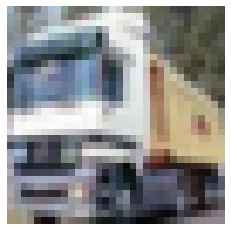

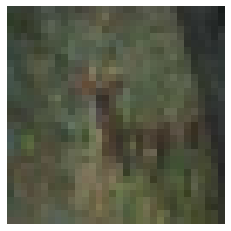

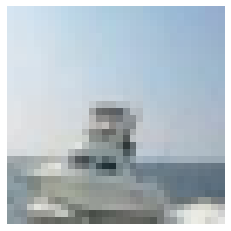

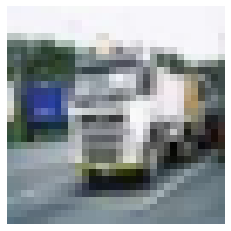

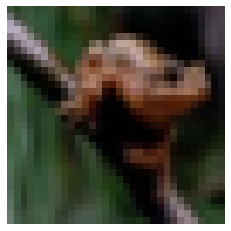

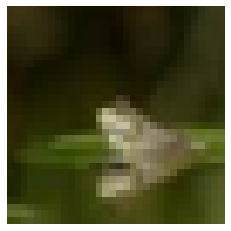

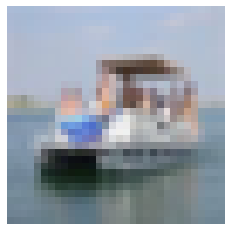

In [30]:
plt.imshow(X_train[1],interpolation="none")
plt.axis('off')
plt.show()
plt.imshow(X_train[10])
plt.axis('off')
plt.show()
plt.imshow(X_train[100])
plt.axis('off')
plt.show()
plt.imshow(X_train[1000])
plt.axis('off')
plt.show()
plt.imshow(X_train[5000])
plt.axis('off')
plt.show()
plt.imshow(X_train[25000])
plt.axis('off')
plt.show()
plt.imshow(X_train[49000])
plt.axis('off')
plt.show()


In [0]:
from keras.utils import to_categorical
# Converting y_train and y_test to binary class matrix.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [6]:
#standardizing data
X_train_normalize= (X_train - np.mean(X_train))/np.std(X_train)
X_test_normalize = (X_test - np.mean(X_test))/np.std(X_test)

print(X_train_normalize.shape,X_test_normalize.T.shape)

(50000, 32, 32, 3) (3, 32, 32, 10000)


In [7]:
#feed forward network

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Activation, Dropout
from keras import regularizers
from keras.optimizers import Adam

input_shape = (X_train_normalize[0].flatten()).shape

model = Sequential()

model.add(Flatten())

model.add(Dense(1024,input_shape = input_shape, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.17))
model.add(Dense(256, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.17))
model.add(Dense(100,  activation="relu"))
model.add(Dense(len(y_train[0])))  # where len(y_train[0] is 10)
model.add(Activation("softmax"))

Adam = Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['acc'])
hist = model.fit(X_train_normalize, y_train, epochs = 50, batch_size = 32, validation_data = (X_test_normalize,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 363us/step - loss: 11.3184 - acc: 0.3791 - val_loss: 5.1054 - val_acc: 0.4413
Epoch 2/50
50000/50000 [==============================] - 16s 322us/step - loss: 3.3969 - acc: 0.4348 - val_loss: 2.4028 - val_acc: 0.4600
Epoch 3/50
50000/50000 [==============================] - 16s 320us/step - loss: 2.1381 - acc: 0.4534 - val_loss: 1.9086 - val_acc: 0.4735
Epoch 4/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.8600 - acc: 0.4599 - val_loss: 1.7568 - val_acc: 0.4813
Epoch 5/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.7512 - acc: 0.4714 - val_loss: 1.7102 - val_acc: 0.4725
Epoch 6/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.6897 - acc: 0.4808 - val_loss: 1.6396 - val_acc: 0.4918
Epoch 7/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.6550 - acc: 0.4895 - val_loss: 1

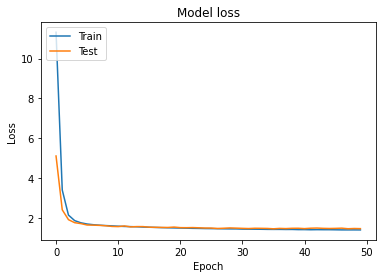

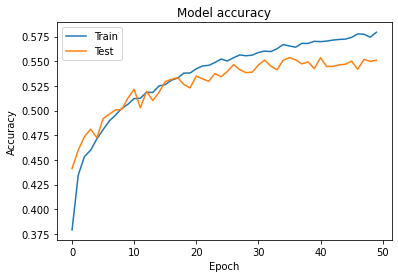

35


In [8]:
#Plot both the training loss as well as the validation loss on the same plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot both the training accuracy as well as the validation accuracy on the same plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print(hist.history['val_acc'].index(max(hist.history['val_acc'])))